In [2]:
from sklearn.decomposition import TruncatedSVD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


estudiantes = pd.DataFrame(

  {

    "Matemáticas": [7.0, 7.5, 7.6, 5.0, 6.0, 7.8, 6.3, 7.9, 6.0, 6.8],

    "Ciencias": [6.5, 9.4, 9.2, 6.5, 6.0, 9.6, 6.4, 9.7, 6.0, 7.2],

    "Español": [9.2, 7.3, 8.0, 6.5, 7.8, 7.7, 8.2, 7.5, 6.5, 8.7],

    "Historia": [8.6, 7.0, 8.0, 7.0, 8.9, 8.0, 9.0, 8.0, 5.5, 9.0],

    "EdFísica": [8.0, 7.0, 7.5, 9.0, 7.3, 6.5, 7.2, 6.0, 8.7, 7.0],

  },

  index=["Lucía", "Pedro", "Inés", "Luis", "Andrés", "Ana", "Carlos", "José", "Sonia", "María"]

)

In [11]:
estudiantes

,Matemáticas,Ciencias,Español,Historia,EdFísica
Lucía,7.0,6.5,9.2,8.6,8.0
Pedro,7.5,9.4,7.3,7.0,7.0
Inés,7.6,9.2,8.0,8.0,7.5
Luis,5.0,6.5,6.5,7.0,9.0
Andrés,6.0,6.0,7.8,8.9,7.3
Ana,7.8,9.6,7.7,8.0,6.5
Carlos,6.3,6.4,8.2,9.0,7.2
José,7.9,9.7,7.5,8.0,6.0
Sonia,6.0,6.0,6.5,5.5,8.7
María,6.8,7.2,8.7,9.0,7.0


In [21]:
datos_estudiantes = estudiantes.reset_index(drop=True)
datos_estudiantes

,Matemáticas,Ciencias,Español,Historia,EdFísica
0,7.0,6.5,9.2,8.6,8.0
1,7.5,9.4,7.3,7.0,7.0
2,7.6,9.2,8.0,8.0,7.5
3,5.0,6.5,6.5,7.0,9.0
4,6.0,6.0,7.8,8.9,7.3
5,7.8,9.6,7.7,8.0,6.5
6,6.3,6.4,8.2,9.0,7.2
7,7.9,9.7,7.5,8.0,6.0
8,6.0,6.0,6.5,5.5,8.7
9,6.8,7.2,8.7,9.0,7.0


In [112]:
componentes = 2
svd = TruncatedSVD(n_components = componentes)

x_reducida_2 = svd.fit_transform(datos_estudiantes)
x_reducida_2

array([[17.60855193, -1.59855173],
       [17.07074326,  1.90636402],
       [18.03248887,  1.15028089],
       [15.23604486, -1.86290932],
       [16.1634327 , -1.6318778 ],
       [17.7206514 ,  2.12154237],
       [16.65597775, -1.30716988],
       [17.49591103,  2.54709878],
       [14.57497601, -1.41686385],
       [17.36793336, -0.58228904]])

In [80]:
x_reducida_2.shape

(10, 2)

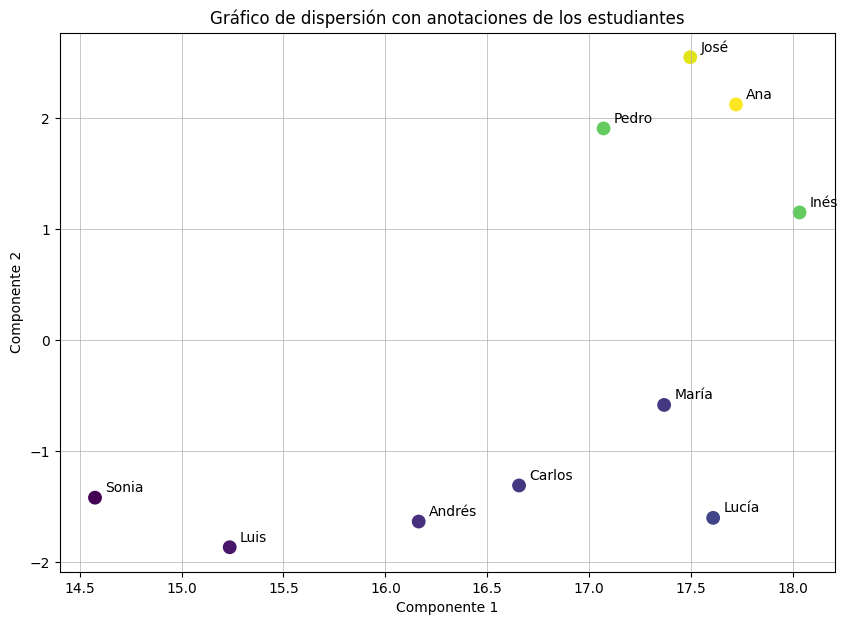

In [293]:
numeros_aleatorios = []

# Condicional para cada coordenada para agregar colores.
for indice, (x, y) in enumerate(x_reducida_2):
    if x < 0 and y < 0:  # Si ambas coordenadas son negativas
        numeros_aleatorios.append(np.random.uniform(3, 5))  # Números cerca de 4
    if x > 0 and y < 0 or x < 0 and y > 0:  # Si hay una coordenada positiva.
        numeros_aleatorios.append(np.random.uniform(4, 6))  # Números cerca de 5
    else:  # Si ambas son positivas
        numeros_aleatorios.append(np.random.uniform(10, 12))  # Números cerca de 11


fig = plt.figure(figsize=(10, 7)) 
plt.scatter(x = x_reducida_2[:, 0], y = x_reducida_2[:, 1], s=80, c=numeros_aleatorios)


for index, nombre in enumerate(estudiantes.index):  # Usar el índice para los nombres

    # ( + .05 ) para ajustar etiquetas encimadas y (x,y) deben ser tublas para que reconozca las coordenadas
    plt.annotate(nombre, (x_reducida_2[index, 0] + .05 , x_reducida_2[index, 1]  + .05 ))

# Graficar
plt.xlabel("Componente 1")  # Etiqueta del eje X
plt.ylabel("Componente 2")  # Etiqueta del eje Y
plt.title("Gráfico de dispersión con anotaciones de los estudiantes")  # Título del gráfico
plt.grid(True, linewidth=0.5)  # Mostrar rejilla
plt.show()

In [308]:
componentes = 3
svd = TruncatedSVD(n_components = componentes)

x_reducida_3 = svd.fit_transform(datos_estudiantes)
x_reducida_3

array([[17.60855193, -1.59855173, -0.74573717],
       [17.07074326,  1.90636402,  0.91411251],
       [18.03248887,  1.15028089,  0.38571754],
       [15.23604486, -1.86290932,  1.73830731],
       [16.1634327 , -1.6318778 , -1.10318989],
       [17.7206514 ,  2.12154237, -0.09575169],
       [16.65597775, -1.30716988, -1.24751522],
       [17.49591103,  2.54709878, -0.34792931],
       [14.57497601, -1.41686385,  2.29512399],
       [17.36793336, -0.58228904, -1.32260625]])

## Después de sacar la matriz de tres componentes con SVD, podemos observar con la tabla de arriba que ¨Y¨ y ¨Z¨ varian entre positivo y negativo, por ello quise hacer una distinción, sobre qué grupo pertenecería.

In [309]:
numeros_aleatorios = []

# Condicional para cada coordenada para agregar colores.
for indice, (x, y, z) in enumerate(x_reducida_3):
    if y < 0 and z < 0:  # Si hay 2 coordenadas son negativas
        numeros_aleatorios.append('red')  # Números cerca de 2
    elif y > 0 and z < 0:  # Si y es positiva.
        numeros_aleatorios.append('blue')  # Números cerca de 5
    elif y < 0 and z > 0:  # Si z es positiva.
        numeros_aleatorios.append('orange')  # Números cerca de 5
    elif y > 0 and z > 0:  # Si todas son positivas
        numeros_aleatorios.append('yellow')  # Números cerca de 12

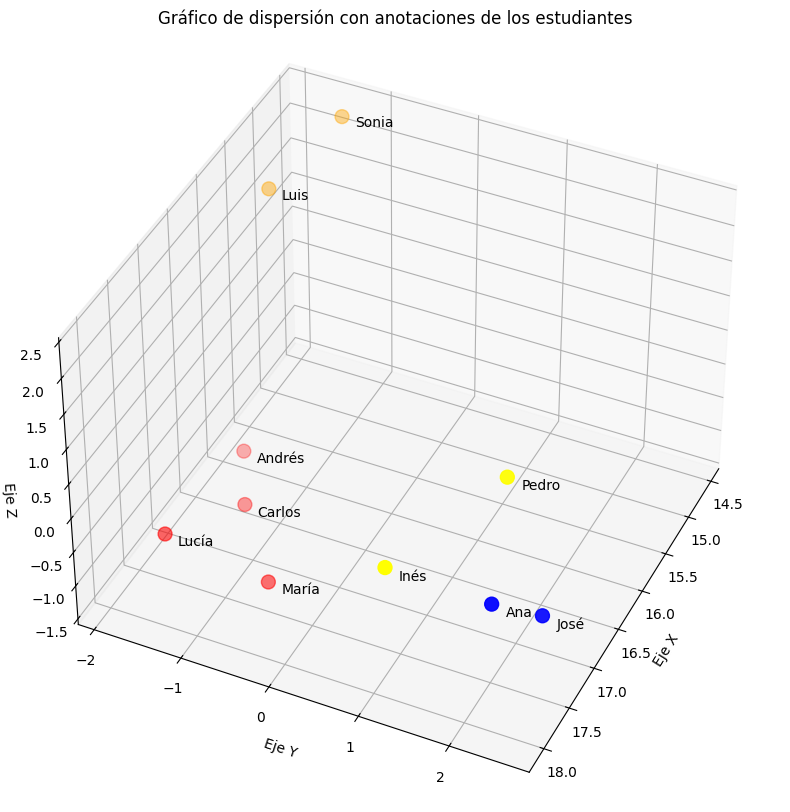

        Matemáticas  Ciencias  Español  Historia  EdFísica
Lucía           7.0       6.5      9.2       8.6       8.0
Pedro           7.5       9.4      7.3       7.0       7.0
Inés            7.6       9.2      8.0       8.0       7.5
Luis            5.0       6.5      6.5       7.0       9.0
Andrés          6.0       6.0      7.8       8.9       7.3
Ana             7.8       9.6      7.7       8.0       6.5
Carlos          6.3       6.4      8.2       9.0       7.2
José            7.9       9.7      7.5       8.0       6.0
Sonia           6.0       6.0      6.5       5.5       8.7
María           6.8       7.2      8.7       9.0       7.0


In [328]:
# Importar la libreria
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(20, 10))  # Crear una figura con tamaño personalizado
ax = fig.add_subplot(111, projection='3d')  # Añadir un subplot con proyección 3D

x3 =  x_reducida_3[:,0]
y3 =  x_reducida_3[:,1]
z3 =  x_reducida_3[:,2]

# Graficar los puntos
scatter = ax.scatter(x3, y3, z3, c=numeros_aleatorios, s=100)  # Colores según z, paleta 'viridis'


# Añadir etiquetas en el espacio 3D
for index, nombre in enumerate(estudiantes.index):
    ax.text(x_reducida_3[index, 0]+.08,   # Coordenada X
            x_reducida_3[index, 1]+.2,   # Coordenada Y 
            x_reducida_3[index, 2],   # Coordenada Z 
            nombre,                        # Texto (nombre del estudiante)
            fontsize=10, color='black')     # Tamaño de letra y color


ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')  # Ajustar el padding del eje Z
ax.set_title('Gráfico de dispersión con anotaciones en 3D')

ax.view_init(elev=40, azim=25)  # Modificar ángulo de elevación y azimut


plt.title("Gráfico de dispersión con anotaciones de los estudiantes")  # Título del gráfico
plt.grid(True, linewidth=0.5)  # Mostrar rejilla

#Guardar gráfico
plt.savefig("Gráfico de dispersión con anotaciones de los estudiantes 4 grupos.png", dpi=300, bbox_inches='tight')

plt.show()

print(estudiantes)

## Esto es interesante, porque si hacemos un análisis visual podemos incluso agrupar mejor los datos, es decir, hay dos individuos, que sobresalen más en ciencias, y por ello se van a otro grupo, mientras que pedro e inés tambien sobre salen pero no demasiado, con este análisis.

(-0.5, 2369.5, 2434.5, -0.5)

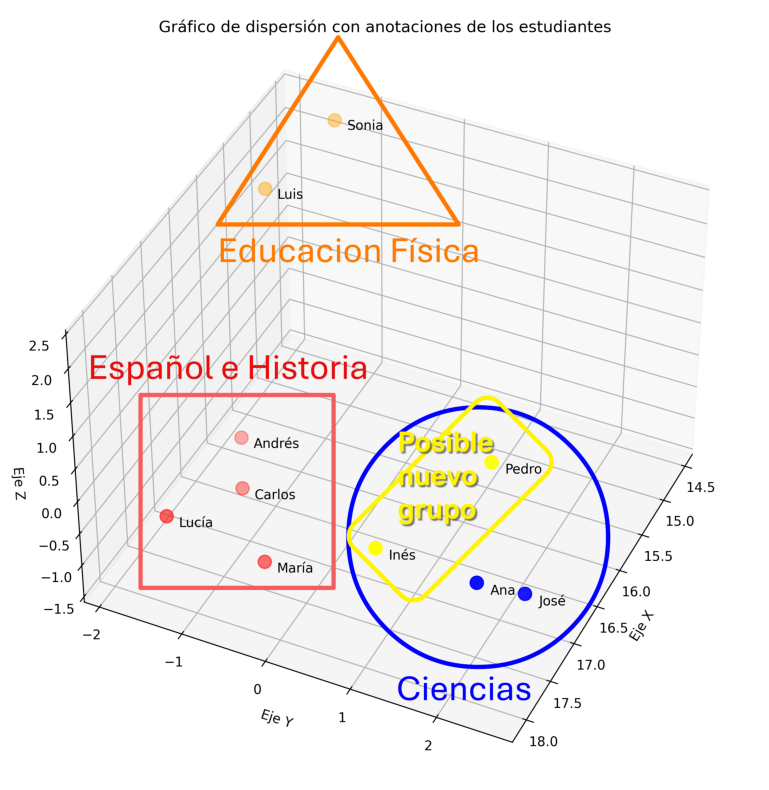

In [334]:
from PIL import Image

# Cargar y mostrar la imagen
fig = plt.figure(figsize=(18, 10))
img = Image.open('Gráfico de dispersión con anotaciones de los estudiantes 4 grupos hechos.png')  # Reemplaza con el camino real
plt.imshow(img)
plt.axis('off')  # Ocultar ejes

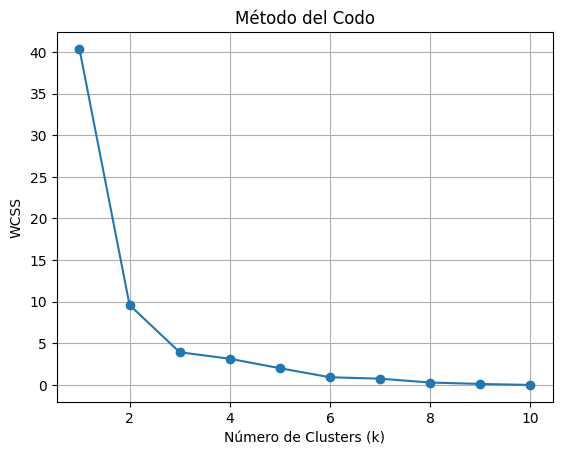

In [285]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Datos reducidos con SVD
componentes = 2
svd = TruncatedSVD(n_components=componentes)
x_reducida_3 = svd.fit_transform(datos_estudiantes)

# Método del Codo para determinar el número óptimo de clusters
wcss = []  # Almacenar las sumas de distancias dentro del cluster
for i in range(1, 11):  # Probar valores de k desde 1 hasta 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x_reducida_3)
    wcss.append(kmeans.inertia_)  # Guardar WCSS para cada k

# Graficar el resultado
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


## Por curiosidad quería saber cómo agrupaba el cluster si usabamos KMeans, y te sugiere agrupara en 3 clusters, pero no toma en cuenta esos dos individuos qe sobre salen, y al hacer 3 agrupaciones lo generaliza más.

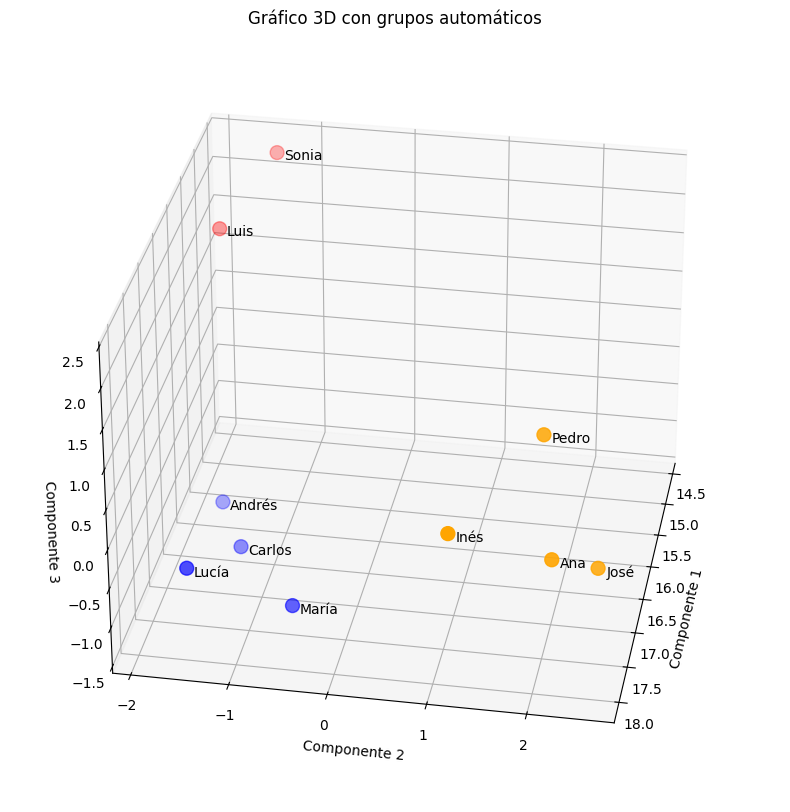

        Matemáticas  Ciencias  Español  Historia  EdFísica
Lucía           7.0       6.5      9.2       8.6       8.0
Pedro           7.5       9.4      7.3       7.0       7.0
Inés            7.6       9.2      8.0       8.0       7.5
Luis            5.0       6.5      6.5       7.0       9.0
Andrés          6.0       6.0      7.8       8.9       7.3
Ana             7.8       9.6      7.7       8.0       6.5
Carlos          6.3       6.4      8.2       9.0       7.2
José            7.9       9.7      7.5       8.0       6.0
Sonia           6.0       6.0      6.5       5.5       8.7
María           6.8       7.2      8.7       9.0       7.0


In [335]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supongamos que ya has reducido tus datos con SVD:
componentes = 3
svd = TruncatedSVD(n_components=componentes)
x_reducida_3 = svd.fit_transform(datos_estudiantes)  # Datos ya reducidos con SVD

# Aplicar KMeans para identificar grupos (4 grupos en este ejemplo)
kmeans = KMeans(n_clusters=3, random_state=42)
grupos = kmeans.fit_predict(x_reducida_3)  # Asignar cada punto a un grupo

# Definir colores para los grupos
colores = ['red', 'blue', 'orange', 'yellow']
numeros_aleatorios2 = [colores[grupo] for grupo in grupos]

# Crear gráfico 3D
fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(111, projection='3d')

x3 = x_reducida_3[:, 0]
y3 = x_reducida_3[:, 1]
z3 = x_reducida_3[:, 2]

# Graficar puntos con colores según su grupo
scatter = ax.scatter(x3, y3, z3, c=numeros_aleatorios2, s=100)

# Añadir etiquetas para cada estudiante
for index, nombre in enumerate(estudiantes.index):
    ax.text(x3[index] + 0.1, y3[index] + 0.1, z3[index], nombre, fontsize=10, color="black")


ax.view_init(elev=30, azim=10)  # Modificar ángulo de elevación y azimut

# Configurar ejes
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')
ax.set_title('Gráfico 3D con grupos automáticos')

plt.savefig("Gráfico de dispersión 3D KMEANS grupos.png", dpi=300, bbox_inches='tight')

plt.show()

print(estudiantes)


(-0.5, 2369.5, 2434.5, -0.5)

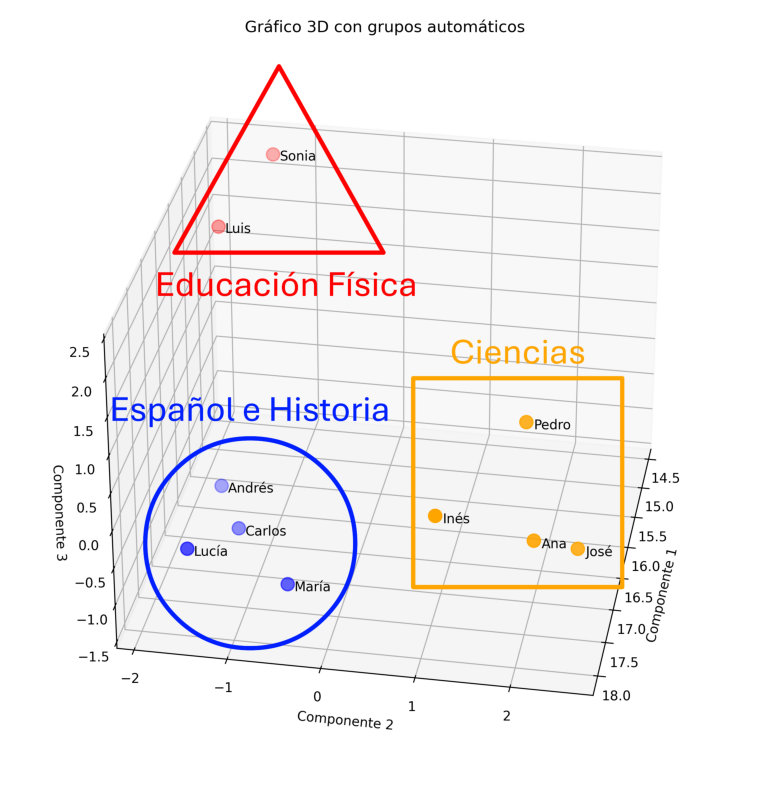

In [336]:
# Cargar y mostrar la imagen
fig = plt.figure(figsize=(18, 10))
img = Image.open("Gráfico de dispersión 3D KMEANS grupos hechos.png")  # Reemplaza con el camino real
plt.imshow(img)
plt.axis('off')  # Ocultar ejes